# **HYPOTHESIS: There have been more tuberculosis cases in years with lower vaccination coverage.**

## **1. Importing and filtering the data**

#### **A. Importing cases of tuberculosis from 2001 to 2020**

In [2]:
import pandas as pd

In [3]:
URL = 'https://raw.githubusercontent.com/rossmodolin/AluraDataScienceBootcamp/main/Module%202/tuberculosis_cases.csv'

cases = pd.read_csv(URL, encoding="ISO-8859-1", sep=";").drop(['IG'], axis=1).drop(['Total'], axis=1).drop([20]).astype(int)
cases = cases[0:19]
cases.head()

,Ano,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
0,2001,674,364,2334,150,3517,223,320,2901,1568,4240,1158,1369,4542,1332,557,7935,1331,1658,16976,19775,3224,1695,5231,980,1425,1148,638
1,2002,639,368,2286,172,3785,296,333,3043,1519,4385,1179,1395,4870,1351,599,7853,5886,1569,16789,19807,3436,1873,5509,914,1248,1149,606
2,2003,651,368,2375,206,3940,273,284,2980,1448,4586,1354,1465,5153,1426,664,8435,5982,1563,16130,19202,3454,1903,5786,1022,1267,1242,614
3,2004,628,356,2559,218,4089,275,260,2974,1563,4461,1373,1508,5451,1422,634,8212,6086,1529,15832,18584,3294,1870,5906,1034,1148,1089,625
4,2005,630,329,2477,155,3975,274,253,3179,1551,4656,1356,1482,5319,1507,834,7937,5926,1448,15325,18428,3418,1837,5661,1053,1344,1081,621


In [4]:
cases_melt = cases.melt(id_vars=['Ano'])
cases_melt.columns = ['year', 'state', 'cases']
cases_melt.head()

,year,state,cases
0,2001,RO,674
1,2002,RO,639
2,2003,RO,651
3,2004,RO,628
4,2005,RO,630


#### **B. Importing vaccination coverage from 2001 to 2019**

In [5]:
URL2 = 'https://raw.githubusercontent.com/rossmodolin/AluraDataScienceBootcamp/main/Module%202/tuberculosis_vaccine_coverage.csv'

vaccines = pd.read_csv(URL2, encoding="utf-8", sep=";").replace("...", "0").drop(['Total'], axis=1).drop([27], axis=0).T.reset_index().drop([0], axis=0).astype(float)

vaccines.columns = ['Ano', 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB',
       'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS',
       'MT', 'GO', 'DF']

vaccines['Ano'] = vaccines['Ano'].astype(int)
vaccines = vaccines[7:26]
vaccines.head()

,Ano,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
8,2001,114.36,134.96,108.31,104.68,118.34,181.41,122.08,122.47,116.52,118.81,107.28,121.52,118.78,111.00,112.29,117.46,102.86,106.58,106.79,111.03,112.38,104.27,104.48,120.00,115.54,110.42,122.91
9,2002,102.43,132.91,107.78,116.91,127.04,129.05,113.06,118.94,109.56,110.69,114.24,112.80,123.86,122.14,105.13,107.19,97.29,108.58,110.33,108.99,106.78,102.76,103.68,114.94,112.31,112.81,116.89
10,2003,97.42,121.07,109.89,105.42,122.87,123.55,102.09,119.88,101.91,103.20,113.32,109.52,126.01,115.74,104.74,106.68,91.92,110.03,111.00,108.87,105.89,101.99,103.81,108.05,108.02,111.28,115.71
11,2004,106.60,116.13,118.64,97.50,128.59,121.20,109.27,129.81,113.52,115.70,111.53,120.51,121.69,123.39,107.35,123.28,108.04,110.09,109.32,109.14,104.83,103.76,101.99,99.81,111.56,121.32,115.74
12,2005,109.69,110.46,130.49,107.16,146.91,123.56,110.81,132.83,108.98,118.57,112.21,125.97,117.31,118.76,104.81,124.43,108.89,108.75,115.50,106.30,104.32,103.14,103.22,102.71,113.86,116.34,109.26


In [6]:
vaccines_melt = vaccines.melt(id_vars=['Ano'])
vaccines_melt.columns = ['year', 'state', 'coverage']
vaccines_melt.head()

,year,state,coverage
0,2001,RO,114.36
1,2002,RO,102.43
2,2003,RO,97.42
3,2004,RO,106.60
4,2005,RO,109.69


####**C. Grouping data by region**

In [239]:
# Grouping regions like this to perform queries more easily
south = ['PR', 'SC', 'RS']
southeast = ['MG', 'ES', 'RJ', 'SP']
midwest = ['MS', 'MT', 'GO', 'DF']
northeast = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
north = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO']

##### **A. Cases of tuberculosis by region**

######**SOUTH**

In [240]:
cases_south = cases_melt.query('state in @south').groupby('year').mean()
cases_south.head()

,cases
year,
2001,3383.333333
2002,3606.000000
2003,3714.333333
2004,3690.000000
2005,3638.666667


######**SOUTHEAST**

In [241]:
cases_southeast = cases_melt.query('state in @southeast').groupby('year').mean()
cases_southeast.head()

,cases
year,
2001,9935.00
2002,11012.75
2003,10719.25
2004,10507.75
2005,10281.75


######**MIDWEST**

In [242]:
cases_midwest = cases_melt.query('state in @midwest').groupby('year').mean()
cases_midwest.head()

,cases
year,
2001,1047.75
2002,979.25
2003,1036.25
2004,974.00
2005,1024.75


######**NORTHEAST**

In [243]:
cases_northeast = cases_melt.query('state in @northeast').groupby('year').mean().reset_index()
cases_northeast.head()

,year,cases
0,2001,2844.666667
1,2002,2910.444444
2,2003,3056.777778
3,2004,3066.444444
4,2005,3091.222222


######**NORTH**

In [244]:
cases_north = cases_melt.query('state in @north').groupby('year').mean().reset_index()
cases_north.head()

,year,cases
0,2001,1083.142857
1,2002,1125.571429
2,2003,1156.714286
3,2004,1197.857143
4,2005,1156.142857


##### **B. Vaccination coverage by region**

######**SOUTH**

In [245]:
vaccines_south = vaccines_melt.query('state in @south').groupby('year').mean()
vaccines_south.head()

,coverage
year,
2001,107.043333
2002,104.406667
2003,103.896667
2004,103.526667
2005,103.560000


######**SOUTHEAST**

In [246]:
vaccines_southeast = vaccines_melt.query('state in @southeast').groupby('year').mean()
vaccines_southeast.head()

,coverage
year,
2001,106.8150
2002,106.2975
2003,105.4550
2004,109.1475
2005,109.8600


######**MIDWEST**

In [247]:
vaccines_midwest = vaccines_melt.query('state in @midwest').groupby('year').mean()
vaccines_midwest.head()

,coverage
year,
2001,117.2175
2002,114.2375
2003,110.7650
2004,112.1075
2005,110.5425


######**NORTHEAST**

In [248]:
vaccines_northeast = vaccines_melt.query('state in @northeast').groupby('year').mean()
vaccines_northeast.head()

,coverage
year,
2001,116.236667
2002,113.838889
2003,111.222222
2004,118.531111
2005,118.207778


######**NORTH**

In [249]:
vaccines_north = vaccines_melt.query('state in @north').groupby('year').mean()
vaccines_north.head()

,coverage
year,
2001,126.305714
2002,118.454286
2003,111.758571
2004,113.990000
2005,119.868571


## **2. Visualizing the data**

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### **Comparison between region and vaccine coverage**

#### **NORTH**

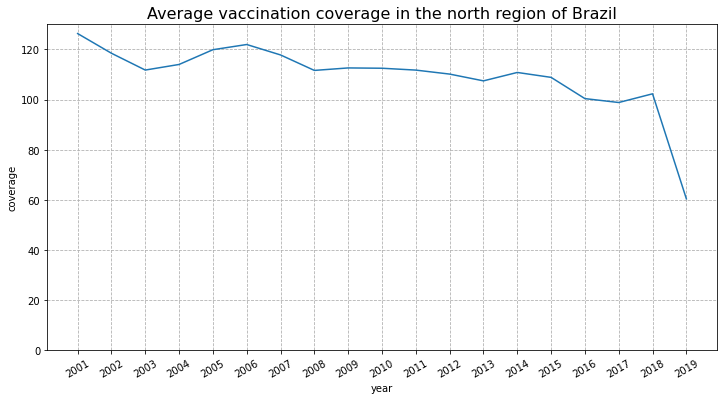

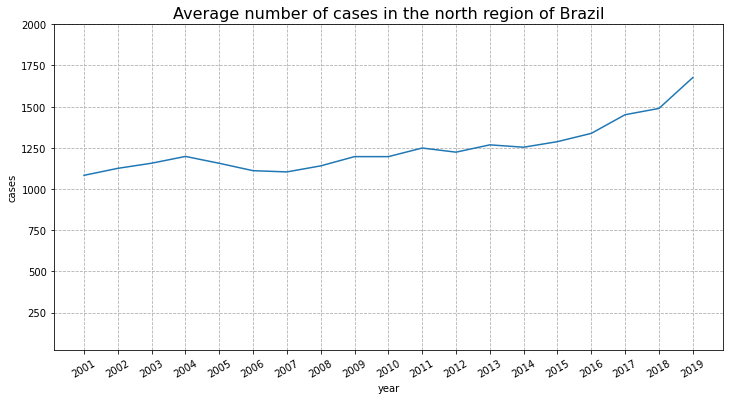

In [257]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((0,130))

ax2 = sns.lineplot(data=vaccines_north, x='year', y='coverage')
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average vaccination coverage in the north region of Brazil', size=16)
plt.show()

#------------------------------------------------------------------------------

plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((20,2000))

ax1 = sns.lineplot(data=cases_north, x='year', y='cases')
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average number of cases in the north region of Brazil', size=16)
plt.show()

#### **NORTHEAST**

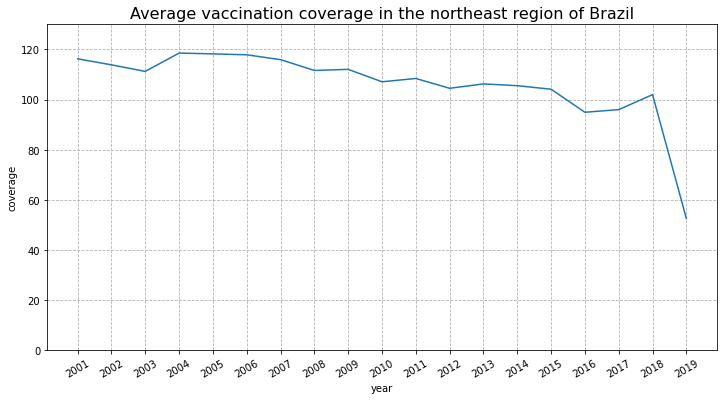

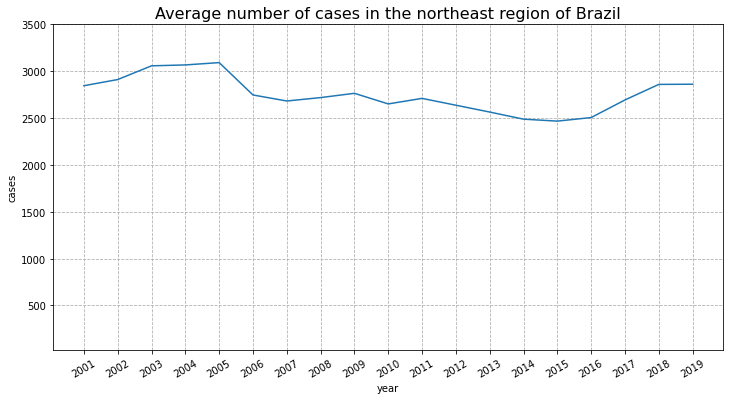

In [261]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((0,130))

ax2 = sns.lineplot(data=vaccines_northeast, x='year', y='coverage')
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average vaccination coverage in the northeast region of Brazil', size=16)
plt.show()

#------------------------------------------------------------------------------

plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((20,3500))

ax1 = sns.lineplot(data=cases_northeast, x='year', y='cases')
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average number of cases in the northeast region of Brazil', size=16)
plt.show()

#### **MIDWEST**

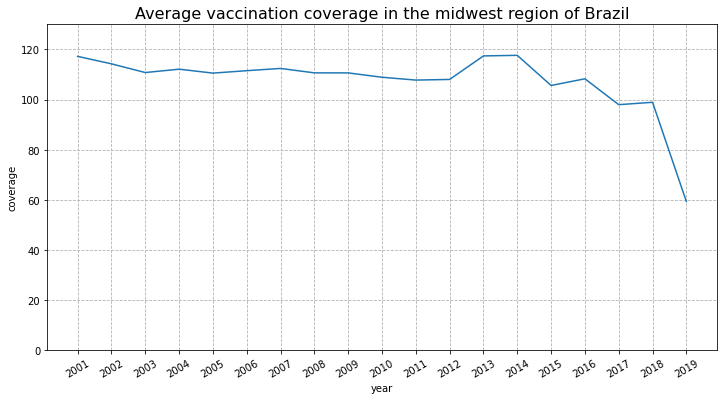

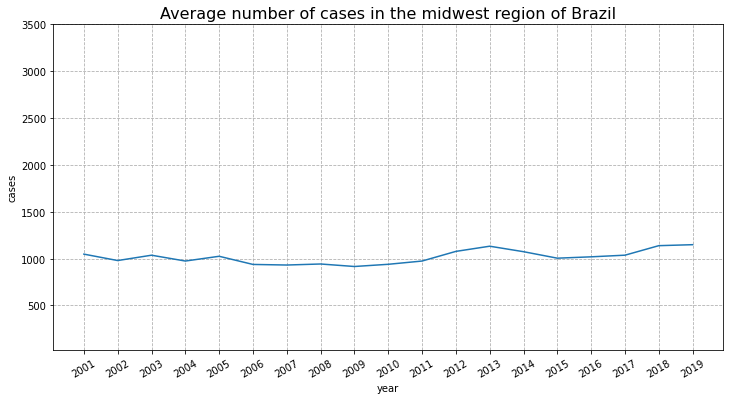

In [262]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((0,130))

ax2 = sns.lineplot(data=vaccines_midwest, x='year', y='coverage')
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average vaccination coverage in the midwest region of Brazil', size=16)
plt.show()

#------------------------------------------------------------------------------

plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((20,3500))

ax1 = sns.lineplot(data=cases_midwest, x='year', y='cases')
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average number of cases in the midwest region of Brazil', size=16)
plt.show()

#### **SOUTHEAST**

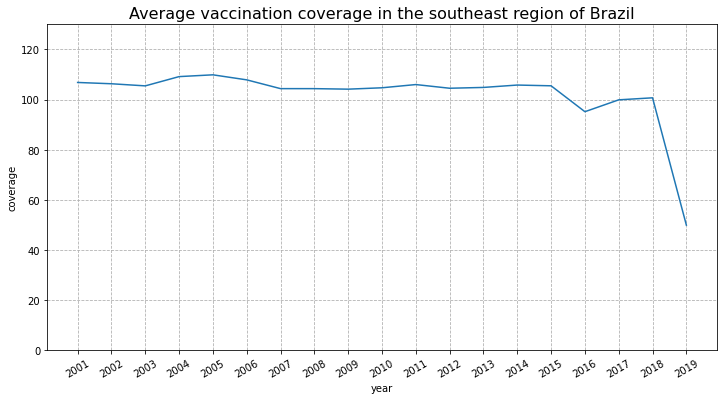

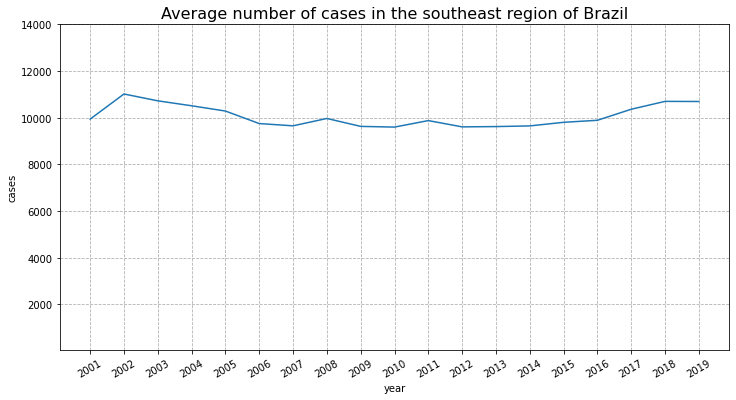

In [270]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((0,130))

ax2 = sns.lineplot(data=vaccines_southeast, x='year', y='coverage')
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average vaccination coverage in the southeast region of Brazil', size=16)
plt.show()

#------------------------------------------------------------------------------

plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((20,14000))

ax1 = sns.lineplot(data=cases_southeast, x='year', y='cases')
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average number of cases in the southeast region of Brazil', size=16)
plt.show()

#### **SOUTH**

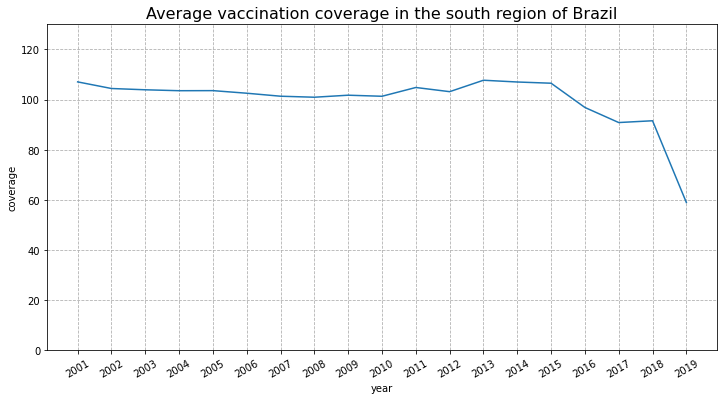

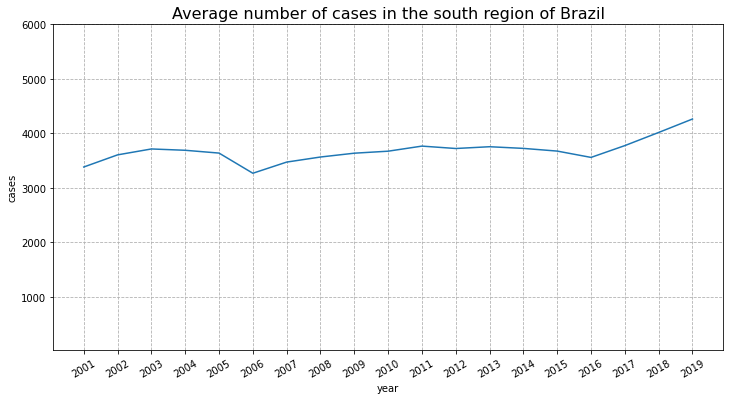

In [268]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((0,130))

ax2 = sns.lineplot(data=vaccines_south, x='year', y='coverage')
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average vaccination coverage in the south region of Brazil', size=16)
plt.show()

#------------------------------------------------------------------------------

plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
plt.ylim((20,6000))

ax1 = sns.lineplot(data=cases_south, x='year', y='cases')
ax1.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.grid(True, linestyle="--")
plt.title('Average number of cases in the south region of Brazil', size=16)
plt.show()

## **3. Interpreting the data**

The following conclusions can be drawn for each region in Brazil:

**1.North:**
There seems to be a relationship between lower vaccine coverage and an increase in the number of cases. This increase seems to continue even after vaccine coverage starts rising again (see periods from 2001-2004 and 2018-2019).

**2.Northeast:**
The relationship between lower vaccine coverage and higher number of cases is not so clear in the northeastern region of Brazil. While this can be seen in the period between 2001-2003, this cannot be verified, for example, between 2018 and 2019, when vaccination coverage fell to under 60%, and the number of cases remained stable.

**3.Midwest and southeast:**
The graphs for these regions are very similar to the ones that refer to the northeast region. There is no clear relationship between a decrease in vaccination coverage and a higher number of cases.

**5.South:**
Like in the north region of Brazil, there seems to be a relationship between lower vaccine coverage and an increase in the number of cases. It is particularly interesting to note that the number of cases starts increasing in 2016, exactly when vaccine coverage drops below 100%.

## **4. Ideas for further analyses or improvements**

Even though there seems to be a relationship between the number of cases of tuberculosis when vaccine coverage drops in 2 out of 5 regions in Brazil, it is necessary to run statistical tests to verify whether there is a correlation between these two sets of data. However, even if there is a correlation, we cannot state that a lower vaccine coverage was the **cause** of the increase in the number of cases, as **correlation does not equal causation**.

In terms of coding, as most of the code was repeated for each Brazilian region, defining functions to filter data and create visualizations would definitely have made the whole analysis cleaner and more concise.